In [124]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
%matplotlib inline

In [125]:
df = pd.read_csv('stores_final.csv')

In [126]:
df.head()

,bizesNm,frnNm,ctprvnNm,signguNm,adongNm,rdnmAdr,lon,lat
0,장모님치킨가창점,장모님,대구광역시,달성군,가창면,대구광역시 달성군 가창면 가창동로 6,128.644459,35.782663
1,정통숯불바베큐치킨상인점,NONE,대구광역시,달서구,상인2동,대구광역시 달서구 상원로 46,128.536144,35.813966
2,짱구피자치킨,NONE,경기도,동두천시,불현동,경기도 동두천시 못골로 30,127.065903,37.901262
3,쭈노치킨,NONE,경기도,김포시,고촌읍,경기도 김포시 고촌읍 장차로13번길 18,126.769859,37.603752
4,챠밍치킨,NONE,강원도,원주시,문막읍,강원도 원주시 문막읍 원문로 1570,127.833840,37.321903


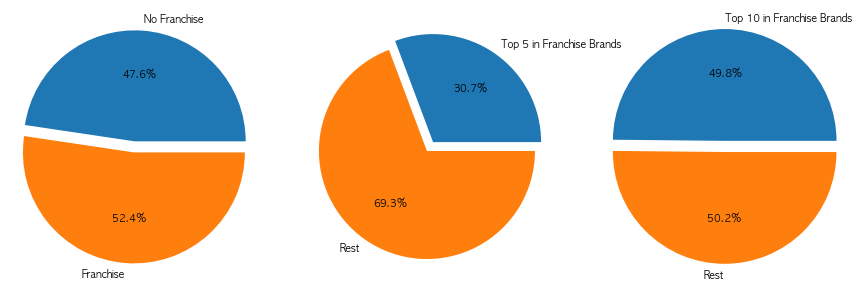

In [144]:
fig, axes = plt.subplots(1, 3, figsize=(15,5))

## data
n_NONE = df['frnNm'].value_counts().iloc[0].sum()
n_else = df['frnNm'].value_counts().iloc[1:].sum()

no_NONE = df['frnNm'].value_counts().iloc[1:]
n_top5 = no_NONE.iloc[:5].sum()
n_else5 = no_NONE.iloc[5:].sum()

n_top10 = no_NONE.iloc[:10].sum()
n_else10 = no_NONE.iloc[10:].sum()

labels1 = 'No Franchise', 'Franchise'
size1 = [n_NONE, n_else]

axes[0].pie(size1, labels=labels1, explode=(0, 0.1), autopct='%1.1f%%')
axes[0].axis('equal')

labels2 = 'Top 5 in Franchise Brands', 'Rest'
size2 = [n_top5, n_else5]

axes[1].pie(size2, labels=labels2, explode=(0, 0.1), autopct='%1.1f%%')
axes[1].axis('equal')

labels3 = 'Top 10 in Franchise Brands', 'Rest'
size3 = [n_top10, n_else10]

axes[2].pie(size3, labels=labels3, explode=(0, 0.1), autopct='%1.1f%%')
axes[2].axis('equal')
plt.show()

So around 50% of chicken stores are one of franchise. And around 50% of the franchise are from top 10 franchise. Top 10 are:

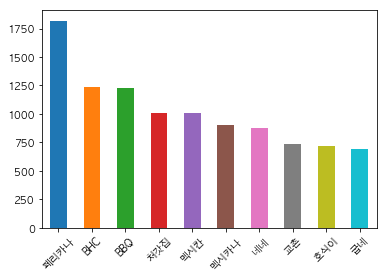

In [128]:
matplotlib.rc('font', family='AppleGothic')
no_NONE.iloc[:10].plot(kind="bar")
plt.xticks(rotation=45)
plt.show()

We can see that 페리카나 is the most popular one, while BHC and BBQ are coming next.
Let's see the distribution by administration

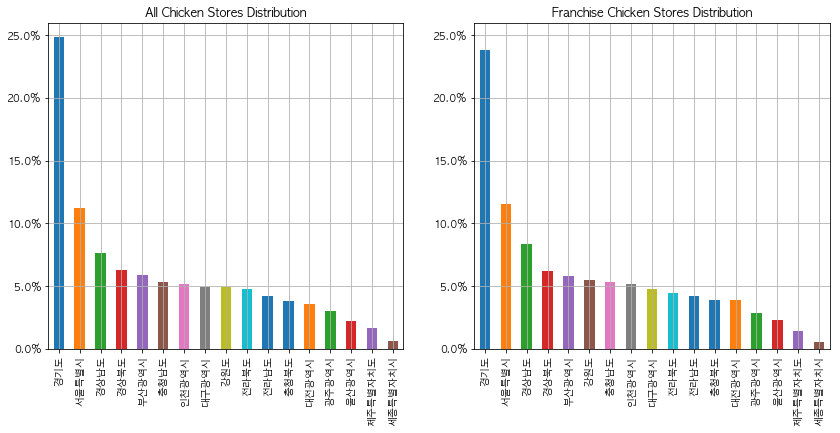

In [129]:
from matplotlib.ticker import PercentFormatter
fig, axes = plt.subplots(1, 2, figsize=(14,6))
df['ctprvnNm'].value_counts(normalize=True).plot(kind="bar",
                                                 title="All Chicken Stores Distribution",
                                                 ax=axes[0])
df[df['frnNm'] != "NONE"]['ctprvnNm'].value_counts(normalize=True).plot(kind="bar",
                                                                        title="Franchise Chicken Stores Distribution",
                                                                        ax=axes[1])
axes[0].set_ylim(0, 0.26)
axes[1].set_ylim(0, 0.26)
axes[0].yaxis.set_major_formatter(PercentFormatter(1))
axes[1].yaxis.set_major_formatter(PercentFormatter(1))
axes[0].grid(True)
axes[1].grid(True)
plt.show()

There is difference of around 2% in the ratio from Gyeoggi-do. And Gangwon-do is not that popular in Franchise world

In [130]:
seoul = df[df['ctprvnNm'] == "서울특별시"]
gyeonggi = df[df['ctprvnNm'] == "경기도"]
incheon = df[df['ctprvnNm'] == "인천광역시"]
ratio = (seoul.shape[0]+gyeonggi.shape[0]+incheon.shape[0])/df.shape[0]
print("Fried chicken stores in capital area is around {:2.1f}% of all chicken stores".format(ratio*100))

fran = df[df['frnNm'] != "NONE"]
seoul_fr = fran[fran['ctprvnNm'] == "서울특별시"]
gyeonggi_fr = fran[fran['ctprvnNm'] == "경기도"]
incheon_fr = fran[fran['ctprvnNm'] == "인천광역시"]
ratio_fr = (seoul_fr.shape[0]+gyeonggi_fr.shape[0]+incheon_fr.shape[0])/fran.shape[0]
print("Franchise fried chicken stores in capital area is around {:2.1f}% of all franchise chicken stores".format(ratio_fr*100))

n_fran = df[df['frnNm'] == "NONE"]
seoul_nfr = n_fran[n_fran['ctprvnNm'] == "서울특별시"]
gyeonggi_nfr = n_fran[n_fran['ctprvnNm'] == "경기도"]
incheon_nfr = n_fran[n_fran['ctprvnNm'] == "인천광역시"]
ratio_nfr = (seoul_nfr.shape[0]+gyeonggi_nfr.shape[0]+incheon_nfr.shape[0])/n_fran.shape[0]
print("None franchise fried chicken stores in capital area is around {:2.1f}% of all non franchise chicken stores".format(ratio_nfr*100))

Fried chicken stores in capital area is around 41.2% of all chicken stores
Franchise fried chicken stores in capital area is around 40.5% of all franchise chicken stores
None franchise fried chicken stores in capital area is around 42.0% of all non franchise chicken stores


So there is not much disparity about distribution of chicken stores between all chicken stores, franchised ones, and non franchised ones. Since all of them show that around 41% of chicken restaurants are located in the capital region. But still, compared to population disparity between capital area and non capital area (around 50% of population live in and near Seoul, including Gyeonggi-do and Incheon), there is not much chicken store around the capital area. I can think of a couple of possible reasons

1. Too much competition and high rental price drives stores out of the capital
    - Rental price in capital region, especially Seoul, is notoriously expensive.
    - Around 10 million people live in Seoul while 12 million in Gyeonggi and 3 million in Incheon, but the graphs shows that there is around twice as much of chicken stores in Geyonggi than in Seoul. This suggests that Seoul might not be a good place to open a chicken restaurant in general. 
    
|Admin|% Population |% Stores |
| --- |     ---     |   ---   |
|Seoul|    ~20%     |   ~11%  |
|Gyeonggi| ~24%     |   ~24%  |
|Incheon|  ~6%      |   ~5%   |

2. Top brands siphon a lot of orders
    - Kyochon Chicken, for example, is known to have loyal customers. It might be possible for other brands as well, especially around Seoul. We can check it by visualizing the top brands between the three of administration shown in the table above

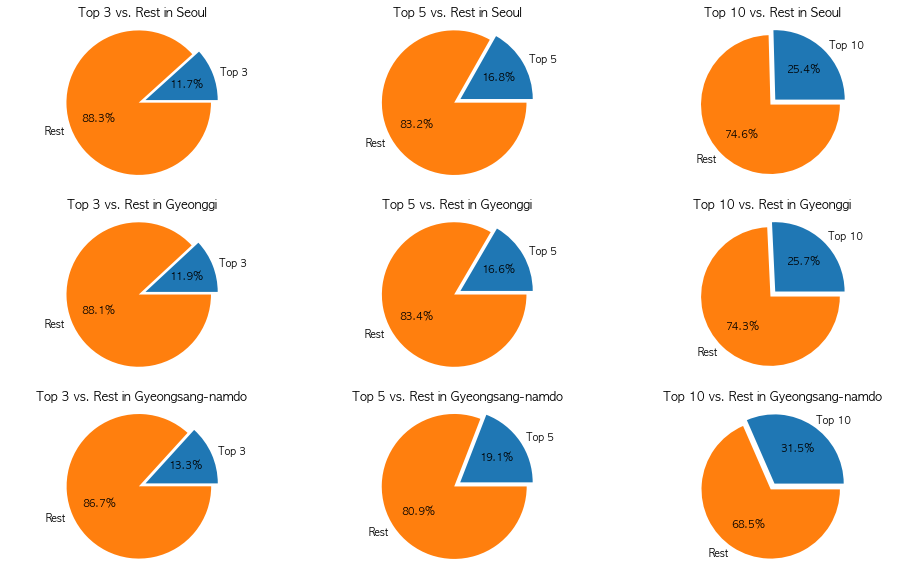

In [165]:
df_seoul = df[df['ctprvnNm'] == "서울특별시"]['frnNm'].value_counts()
df_gyeonggi = df[df['ctprvnNm'] == "경기도"]["frnNm"].value_counts()
df_gyeongsang = df[df['ctprvnNm'] == "경상남도"]["frnNm"].value_counts()

fig, axes = plt.subplots(3,3, figsize=(16,10))
top = [3, 5, 10]
for i in range(3):
    ax = axes[0, i]
    top_brands = df_seoul.iloc[1:top[i]+1].sum()
    rest = df_seoul.iloc[top[i]+1:].sum()+df_seoul.iloc[0].sum()
    x = [top_brands, rest]
    labels = "Top {}".format(top[i]), "Rest"
    ax.pie([top_brands ,rest], labels=labels, autopct='%1.1f%%', explode=(0, 0.1))
    ax.set(title="Top {} vs. Rest in Seoul".format(top[i]))
    ax.axis('equal')
    
for i in range(3):
    ax = axes[1, i]
    top_brands = df_gyeonggi.iloc[1:top[i]+1].sum()
    rest = df_gyeonggi.iloc[top[i]+1:].sum()+df_gyeonggi.iloc[0].sum()
    x = [top_brands, rest]
    labels = "Top {}".format(top[i]), "Rest"
    ax.pie([top_brands ,rest], labels=labels, autopct='%1.1f%%', explode=(0, 0.1))
    ax.set(title="Top {} vs. Rest in Gyeonggi".format(top[i]))
    ax.axis('equal')
    
for i in range(3):
    ax = axes[2, i]
    top_brands = df_gyeongsang.iloc[1:top[i]+1].sum()
    rest = df_gyeongsang.iloc[top[i]+1:].sum()+df_gyeongsang.iloc[0].sum()
    x = [top_brands, rest]
    labels = "Top {}".format(top[i]), "Rest"
    ax.pie([top_brands ,rest], labels=labels, autopct='%1.1f%%', explode=(0, 0.1))
    ax.set(title="Top {} vs. Rest in Gyeongsang-namdo".format(top[i]))
    ax.axis('equal')

Let's look little bit further

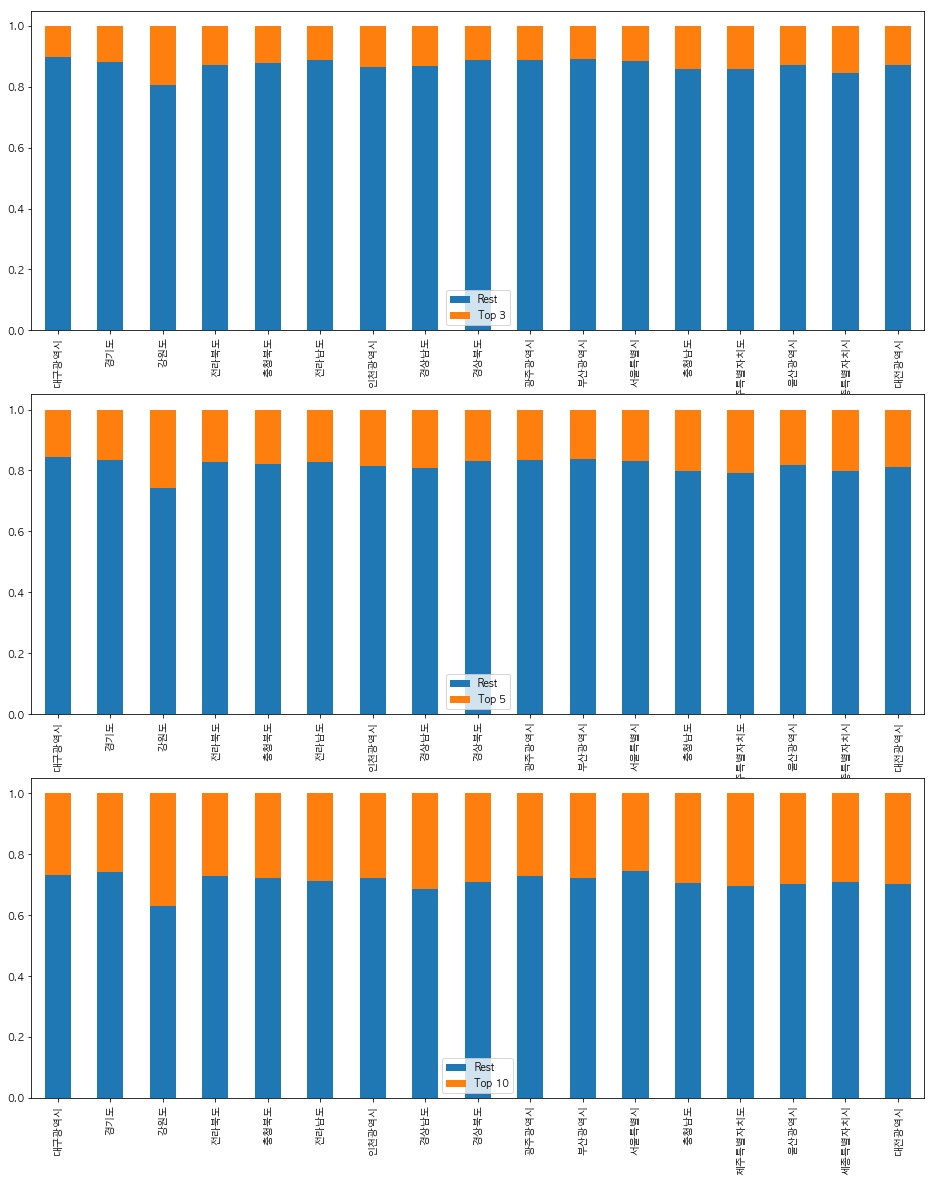

In [211]:
top = [3, 5, 10]
fig, axes = plt.subplots(len(top), 1, figsize=(16,20))
for idx, val in enumerate(top):
    df_prov = pd.DataFrame()
    for i in df['ctprvnNm'].unique():
        prov_uniq = df[df['ctprvnNm'] == i]['frnNm'].value_counts(normalize=True)
        top_franchise = prov_uniq[1:val+1].sum()
        rest = prov_uniq[0].sum() + prov_uniq[val+1:].sum()
        series_prov = pd.Series([top_franchise, rest], index=["Top {}".format(val),
                                                    "Rest"])
        df_prov = pd.concat((df_prov, series_prov.rename("{}".format(i))), axis=1)
        
    df_prov.T.plot.bar(ax=axes[idx], stacked=True)

So based on what we see from the graphs above, it's hard to back up the second hypothesis unless investigated further.

In [354]:
# Visualizing distribution of chicken stores
import ipywidgets as widgets
from ipyleaflet import Map, basemaps, Heatmap
from IPython.display import display

In [418]:
u_p = df['ctprvnNm'].unique()
c=widgets.Dropdown(
    options=[("Select","Select")]+[(x, x) for x in np.sort(u_p)],
    description="ctprvnNm:"
)
s=widgets.Dropdown(
    options=[("Select", "Select")],
    description="signguNm:"
)
a=widgets.Dropdown(
    options=[("Select", "Select")],
    description="adongNm:"
)

def handle_k(change):
    s.options = [("Select","Select")]+[(x, x) for x in np.sort(df[df['ctprvnNm'] == change.new]['signguNm'].unique())]
    
def handle_s(change):
    a.options = [("Select","Select")]+[(x, x) for x in np.sort(df[(df['ctprvnNm'] == c.value) & (df['signguNm'] == change.new)]['adongNm'].unique())]

b = widgets.Button(
    description="query",
    button_style="info"
)
heat_layer = Heatmap(locations=[[37.5665, 126.9780, 1]], radius=5, blur=5, min_opacity=0.3)
def on_button_click(b):
    if c.value == "Select":
        pass
    elif s.value == "Select":
        store = df[df['ctprvnNm'] == c.value]
        heat_loc = [[x[0], x[1], 1] for x in store[['lat', 'lon']].itertuples(index=False)]
        heat_layer.locations = heat_loc        
        
    elif a.value == "Select":
        store = df[(df['ctprvnNm'] == c.value) & (df['signguNm'] == s.value)]
        heat_loc = [[x[0], x[1], 1] for x in store[['lat', 'lon']].itertuples(index=False)]
        heat_layer.locations = heat_loc
    elif a.value != "Select":
        store = df[(df['ctprvnNm'] == c.value) &
                 (df['signguNm'] == s.value) &
                 (df['adongNm'] == a.value)]
        eat_loc = [[x[0], x[1], 1] for x in store[['lat', 'lon']].itertuples(index=False)]
        heat_layer.locations = heat_loc
b.on_click(on_button_click)    

c.observe(handle_k, names='value')
s.observe(handle_s, names='value')

In [419]:
m = Map(
    center=(37.5665, 126.9780),
    zoom=8,
    basemap=basemaps.OpenStreetMap.DE
)
m.add_layer(heat_layer)
display(m, c, s, a, b)

Map(basemap={'url': 'http://{s}.tile.openstreetmap.de/tiles/osmde/{z}/{x}/{y}.png', 'max_zoom': 18, 'attributi…

Dropdown(description='ctprvnNm:', options=(('Select', 'Select'), ('강원도', '강원도'), ('경기도', '경기도'), ('경상남도', '경상남…

Dropdown(description='signguNm:', options=(('Select', 'Select'),), value='Select')

Dropdown(description='adongNm:', options=(('Select', 'Select'),), value='Select')

Button(button_style='info', description='query', style=ButtonStyle())